In [112]:
from sklearn.datasets import load_digits
images, labels = load_digits(2, return_X_y=True)
# Labeled training set
training_images = images[:300]
training_labels = labels[:300]
# Labeled test set
test_images = images[300:]
test_labels = labels[300:]

1. 

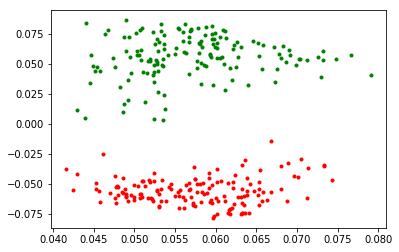

In [113]:
# Principal Component Analysis
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

u, s, vh = np.linalg.svd(training_images)

U = np.array([u[:,0], u[:,1]]).T


onesx = np.array([])
onesy = np.array([])
zerosx = np.array([])
zerosy = np.array([])
for index, number in enumerate(training_labels):
    if number == 1:
        onesx = np.append(onesx, U[index][0])
        onesy = np.append(onesy, U[index][1])
    else:
        zerosx = np.append(zerosx, U[index][0])
        zerosy = np.append(zerosy, U[index][1])

plt.plot(zerosx, zerosy, '.r', onesx, onesy, '.g')
plt.show()

2. 

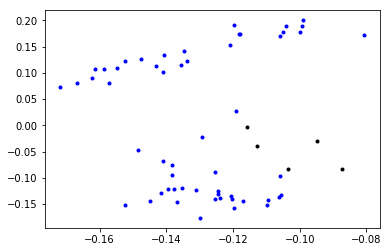

In [114]:
#Compute the PCL and take the top two features
utest, stest, vhtest = np.linalg.svd(test_images)
Utest = np.array([utest[:,0], utest[:,1]]).T


testGuess = np.array([])

for image in Utest:
    #Determine the distances of all the points from the test points
    distances = np.array([])
    for point in U:
        distances = np.append(distances, np.linalg.norm(point - image))
    distances = np.argsort(distances)
    
    #Check the five closest points since k=5
    testSum = 0
    for i in distances[0:5]:
        testSum += training_labels[i]
        
    #If the sum is 0 - 2, that means the majority of the neighbors are zeros
    #If the sum is 3 - 5, that means the majority of the neighbors are ones
    if testSum > 2:
        testGuess = np.append(testGuess, 1)
    else:
        testGuess = np.append(testGuess, 0)

correctx = np.array([])
correcty = np.array([])
wrongx = np.array([])
wrongy = np.array([])
for index in range(0, 60):
    if testGuess[index] == test_labels[index]:
        correctx = np.append(correctx, Utest[index][0])
        correcty = np.append(correcty, Utest[index][1])
    else:
        wrongx = np.append(wrongx, Utest[index][0])
        wrongy = np.append(wrongy, Utest[index][1])
        

plt.plot(correctx, correcty, '.b', wrongx, wrongy, '.k')
plt.show()
        

3. 

In [115]:
wrongSum = 0
for index in range(0, 60):
    if testGuess[index] == test_labels[index]:
        wrongSum +=1
        
avgClassificationError = wrongSum / 60

print("Average Error: ", avgClassificationError)

Average Error:  0.9166666666666666


k-NN Classification Using Higher-Dimensional Features

1. 

In [116]:
u, s, vh = np.linalg.svd(training_images)

print(np.sum(np.power(s[0:8], 2)) / (np.power(np.linalg.norm(training_images), 2)))
print("The top 8 features are needed to reach 95% coverage")

UHigh = np.array([u[:,0], u[:,1], u[:,2], u[:,3], u[:,4], u[:,5], u[:,6], u[:,7]]).T


0.9562731297691338
The top 8 features are needed to reach 95% coverage


2. 

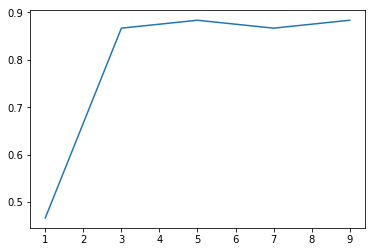

In [117]:
utest, stest, vhtest = np.linalg.svd(test_images)
UTestHigh = np.array([utest[:,0], utest[:,1], utest[:,2], utest[:,3], utest[:,4], utest[:,5], utest[:,6], utest[:,7]]).T

error = np.array([])
for k in range(1, 10, 2):
    
    testGuessHigh = np.array([])

    for image in UTestHigh:
        #Determine the distances of all the points from the test points
        distances = np.array([])
        for point in UHigh:
            distances = np.append(distances, np.linalg.norm(point - image))
        distances = np.argsort(distances)
        #Check the k closest points to image
        testSum = 0
        for i in distances[0:k]:
            testSum += training_labels[i]

        #If the sum is 0 - 2, that means the majority of the neighbors are zeros
        #If the sum is 3 - 5, that means the majority of the neighbors are ones
        if testSum > 2:
            testGuessHigh = np.append(testGuessHigh, 1)
        else:
            testGuessHigh = np.append(testGuessHigh, 0)


    wrongSum = 0
    for index in range(0, 60):
        if testGuessHigh[index] == test_labels[index]:
            wrongSum +=1
    error = np.append(error, wrongSum / 60)
plt.plot(range(1, 10, 2), error)
plt.show()

Based on this plot, I recommend a K of 3 for future k-NN classification of digits '0' and '1' since it gives the best performance compared to its time to compute.